<a href="https://colab.research.google.com/github/Dafr1za/computer-vision/blob/main/Batik/Batik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download dataset
!wget --no-check-certificate \
    https://drive.google.com/file/d/1qFtbQzNZTlL-d9wSwrB5DjDZKFTYLdZ0/view?usp=sharing \
    -O /tmp/Batik.zip

--2021-12-31 05:48:04--  https://drive.google.com/file/d/1qFtbQzNZTlL-d9wSwrB5DjDZKFTYLdZ0/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 173.194.210.113, 173.194.210.102, 173.194.210.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/tmp/Batik.zip’

/tmp/Batik.zip          [ <=>                ]  65.18K  --.-KB/s    in 0.003s  

2021-12-31 05:48:05 (25.0 MB/s) - ‘/tmp/Batik.zip’ saved [66744]



In [ ]:
import os
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/Batik.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

MessageError: ignored

In [ ]:
base_dir = '/tmp/Batik'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'batik-ceplok')
train_dogs_dir = os.path.join(train_dir, 'batik-parang')

validation_cats_dir = os.path.join(validation_dir, 'batik-ceplok')
validation_dogs_dir = os.path.join(validation_dir, 'batik-parang')

In [ ]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_cats_dir)[:10])
print(os.listdir(train_dogs_dir)[:10])

['46.jpg', '9.jpg', '3.jpg', '25.jpg', '24.jpg', '7.jpg', '4.jpg', '29.jpg', '13.jpg', '38.jpg']
['9.jpg', '16.jpg', '15.jpg', '3.jpg', '7.jpg', '4.jpg', '13.jpg', '21.jpg', '18.jpg', '2.jpg']


In [ ]:
# Cek jumlah data train dan data validation
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 21
total training dog images: 20
total validation cat images: 21
total validation dog images: 20


In [ ]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in os.listdir(train_cats_dir)[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in os.listdir(train_dogs_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


NameError: ignored

<Figure size 1152x1152 with 0 Axes>

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (41, 150, 150, 3)
Train Label =  (41,)
Validation Data =  (41, 150, 150, 3)
Validation Label =  (41,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [80 72 68]
Data setelah di-normalisasi  [0.3137255  0.28235295 0.26666668]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  []
Label setelah di-encoder  []


<h3>Definisikan Model</h3>

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [ ]:
# Tampilkan model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
3/3 [==============================] - 1s 150ms/step - loss: 27.1796 - acc: 0.4390 - val_loss: 3.1947 - val_acc: 0.5122
Epoch 2/50
3/3 [==============================] - 0s 71ms/step - loss: 2.5561 - acc: 0.4634 - val_loss: 11.7792 - val_acc: 0.5122
Epoch 3/50
3/3 [==============================] - 0s 70ms/step - loss: 7.9600 - acc: 0.6098 - val_loss: 18.4528 - val_acc: 0.5122
Epoch 4/50
3/3 [==============================] - 0s 71ms/step - loss: 18.6176 - acc: 0.5122 - val_loss: 9.5616 - val_acc: 0.5122
Epoch 5/50
3/3 [==============================] - 0s 71ms/step - loss: 16.4749 - acc: 0.5122 - val_loss: 20.6623 - val_acc: 0.5122
Epoch 6/50
3/3 [==============================] - 0s 69ms/step - loss: 15.8111 - acc: 0.5122 - val_loss: 4.2334 - val_acc: 0.6098
Epoch 7/50
3/3 [==============================] - 0s 71ms/step - loss: 6.6622 - acc: 0.5854 - val_loss: 0.1478 - val_acc: 0.9512
Epoch 8/50
3/3 [==============================] - 0s 70ms/step - loss: 3.1275 - acc: 0.73

<h3>Evaluasi Model</h3>

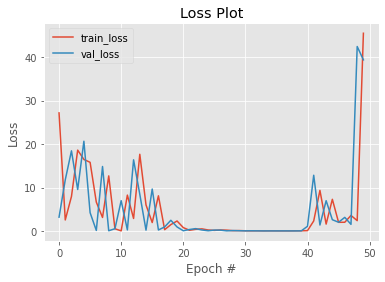

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

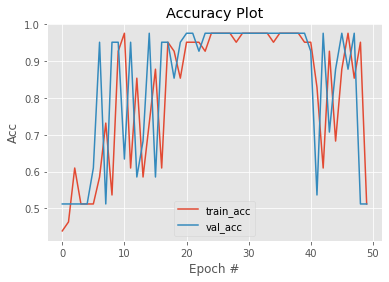

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09        21
           1       0.50      1.00      0.67        20

    accuracy                           0.51        41
   macro avg       0.75      0.52      0.38        41
weighted avg       0.76      0.51      0.37        41

